## 1. Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

## 2. Load Dataset

In [6]:
df = pd.read_csv("loan_approval_dataset.csv")
print("✅ Dataset loaded successfully!")
print(f"Shape: {df.shape}")
df.head()

✅ Dataset loaded successfully!
Shape: (4269, 13)


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## 3. Data Inspection

In [7]:
print("\n=== Missing Values ===")
print(df.isnull().sum())

print("\n=== Data Types ===")
print(df.dtypes)


=== Missing Values ===
loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

=== Data Types ===
loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object


## 4. Encode Categorical Variables

In [8]:
categorical_cols = df.select_dtypes(include='object').columns

# Encode target variable first
if 'Loan_Status' in categorical_cols:
    df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})
    categorical_cols = categorical_cols.drop('Loan_Status')

## 5. Label Encoding

In [9]:
# Encode remaining categorical columns using LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print("\n✅ Categorical variables encoded.")


✅ Categorical variables encoded.


## 6. Check Column Names

In [11]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

## 7. Prepare Features and Target

In [14]:
df.columns = df.columns.str.strip()
X = df.drop('loan_status', axis=1)
y = df['loan_status']

## 8. Feature Scaling

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 9. Train-Test Split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTrain Shape: {X_train.shape}, Test Shape: {X_test.shape}")


Train Shape: (3415, 12), Test Shape: (854, 12)


## 10. Handle Imbalanced Data

In [18]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print(f"\nAfter SMOTE - Train data shape: {X_train_res.shape}, Class distribution: {np.bincount(y_train_res)}")


After SMOTE - Train data shape: (4250, 12), Class distribution: [2125 2125]


## 11. Train Logistic Regression

In [19]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train_res, y_train_res)
y_pred_lr = lr.predict(X_test)

## 12. Train Decision Tree

In [20]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_res, y_train_res)
y_pred_dt = dt.predict(X_test)

## 13. Model Evaluation Function

In [21]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n📊 {name} Model Evaluation:")
    print("Accuracy:", round(accuracy_score(y_true, y_pred), 3))
    print("Precision:", round(precision_score(y_true, y_pred), 3))
    print("Recall:", round(recall_score(y_true, y_pred), 3))
    print("F1 Score:", round(f1_score(y_true, y_pred), 3))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


## 14. Evaluate Models


📊 Logistic Regression Model Evaluation:
Accuracy: 0.932
Precision: 0.908
Recall: 0.913
F1 Score: 0.91

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       531
           1       0.91      0.91      0.91       323

    accuracy                           0.93       854
   macro avg       0.93      0.93      0.93       854
weighted avg       0.93      0.93      0.93       854



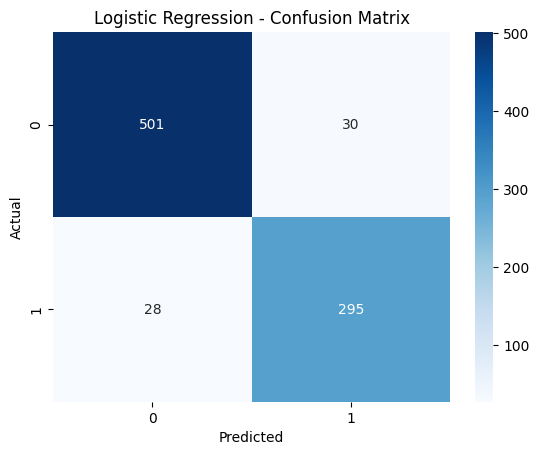


📊 Decision Tree Model Evaluation:
Accuracy: 0.977
Precision: 0.975
Recall: 0.963
F1 Score: 0.969

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       531
           1       0.97      0.96      0.97       323

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.98       854
weighted avg       0.98      0.98      0.98       854



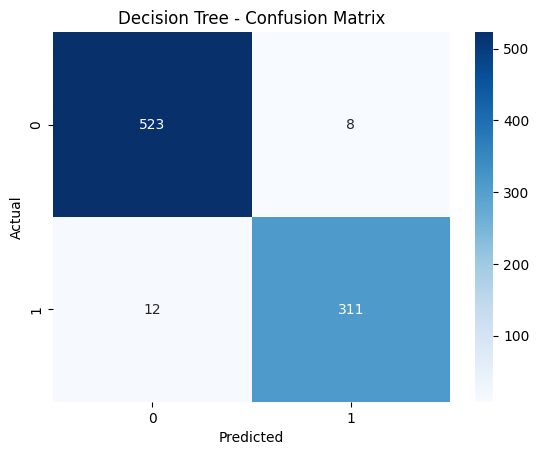

In [22]:
evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("Decision Tree", y_test, y_pred_dt)


## 15. ROC Curve Comparison

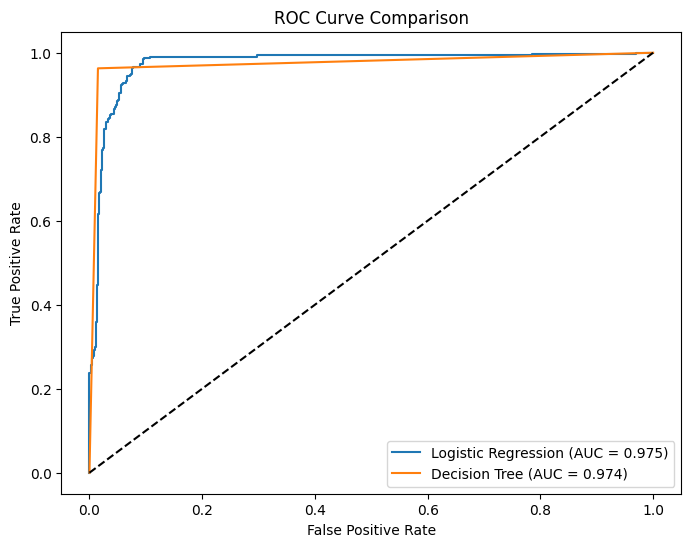

In [24]:
y_pred_lr_prob = lr.predict_proba(X_test)[:, 1]
y_pred_dt_prob = dt.predict_proba(X_test)[:, 1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr_prob)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt_prob)

auc_lr = auc(fpr_lr, tpr_lr)
auc_dt = auc(fpr_dt, tpr_dt)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.3f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


## 16. Model Performance Comparison

In [25]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree"],
    "Accuracy": [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_dt)],
    "Precision": [precision_score(y_test, y_pred_lr), precision_score(y_test, y_pred_dt)],
    "Recall": [recall_score(y_test, y_pred_lr), recall_score(y_test, y_pred_dt)],
    "F1 Score": [f1_score(y_test, y_pred_lr), f1_score(y_test, y_pred_dt)]
})

print("\n=== 📈 Model Performance Comparison ===")
display(results)


=== 📈 Model Performance Comparison ===


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.932084,0.907692,0.913313,0.910494
1,Decision Tree,0.976581,0.974922,0.962848,0.968847
